In [1]:
import numpy as np
import pandas as pd


In [2]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:

data_train = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_test.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_train.csv')

In [10]:
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [12]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [13]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [14]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

In [15]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:

cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [17]:

history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
32/32 [==============================] - 33s 15ms/step - loss: 1.3908 - accuracy: 0.5689 - val_loss: 0.6909 - val_accuracy: 0.7635
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.5888 - accuracy: 0.7900 - val_loss: 0.4802 - val_accuracy: 0.8300
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4626 - accuracy: 0.8391 - val_loss: 0.4393 - val_accuracy: 0.8445
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4047 - accuracy: 0.8550 - val_loss: 0.4058 - val_accuracy: 0.8555
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.8709 - val_loss: 0.3878 - val_accuracy: 0.8690
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.3679 - accuracy: 0.8736 - val_loss: 0.4222 - val_accuracy: 0.8530
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.3662 - accuracy: 0.8708 - val_loss: 0.3706 - val_accuracy: 0.8710
Epoch 8/10
32/32 [

In [18]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.3601110577583313
Test accuracy: 0.8736166954040527


In [20]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [21]:
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
187/187 [==============================] - 15s 80ms/step - loss: 0.5439 - accuracy: 0.7979 - val_loss: 0.4867 - val_accuracy: 0.8213
Epoch 2/50
187/187 [==============================] - 15s 80ms/step - loss: 0.4599 - accuracy: 0.8263 - val_loss: 0.4362 - val_accuracy: 0.8376
Epoch 3/50
187/187 [==============================] - 15s 81ms/step - loss: 0.4200 - accuracy: 0.8424 - val_loss: 0.4251 - val_accuracy: 0.8467
Epoch 4/50
187/187 [==============================] - 15s 81ms/step - loss: 0.3919 - accuracy: 0.8533 - val_loss: 0.4082 - val_accuracy: 0.8517
Epoch 5/50
187/187 [==============================] - 15s 81ms/step - loss: 0.3729 - accuracy: 0.8586 - val_loss: 0.3801 - val_accuracy: 0.8584
Epoch 6/50
187/187 [==============================] - 15s 81ms/step - loss: 0.3552 - accuracy: 0.8655 - val_loss: 0.3811 - val_accuracy: 0.8621
Epoch 7/50
187/187 [==============================] - 15s 82ms/step - loss: 0.3467 - accuracy: 0.8699 - val_loss: 0.3806 - val_accuracy:

In [23]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.3711051642894745
Test accuracy: 0.8981000185012817


In [26]:
history1_dict = history1.history
history1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

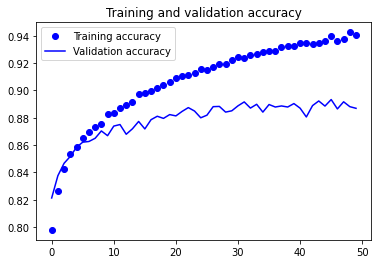

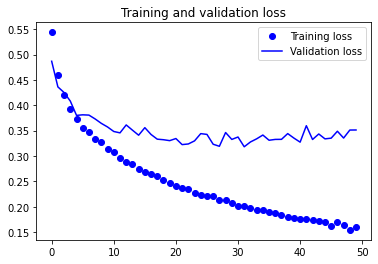

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()